<h1> Heart disease prediction </h1>
<p>I obtained the dataset for this machine learning project from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and will use Machine Learning to predict whether or not a person is suffering from Heart Disease.</p>

<h2>Importing necessary libraries </h2>
Let's start by importing all of the required libraries. To begin, I'll use numpy and pandas. I'll use the matplotlib pyplot subpackage for visualization, rcParams for plot formatting, and rainbow for colors. The sklearn library will be used to create Machine Learning models and data processing.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

I'll import a several libraries to process the data. I'll use the train test split function to split the available dataset for testing and training. I'm using StandardScaler to scale the features.

Next, I'll import all the Machine Learning algorithms I will be using.

1.   K Neighbors Classifier
2.   Support Vector Classifier
3.   Decision Tree Classifier
4.   Random Forest Classifier





In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

<h3>Import dataset</h3>
Now that we have all of the necessary libraries, I can import the dataset and examine it. The data is saved in the dataset.csv file. To read the dataset, I'll use the pandas read csv function.

In [4]:
data = pd.read_csv('dataset.csv')

Now that we have all of the necessary libraries, I can import the dataset and examine it. The data is saved in the data.csv file. To read the dataset, I'll use the pandas read csv function.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values in the dataset, which seems to have 303 rows. There are a total of 13 characteristics and one target value that we need to locate.



In [6]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Each feature column has a distinct scale and is highly variable. While the age limit is set at 77, the chol (serum cholestoral) limit is set at 564.

<h2>Understanding the data </h2>
Now we may utilize visuals to better comprehend our data before considering any processing options.


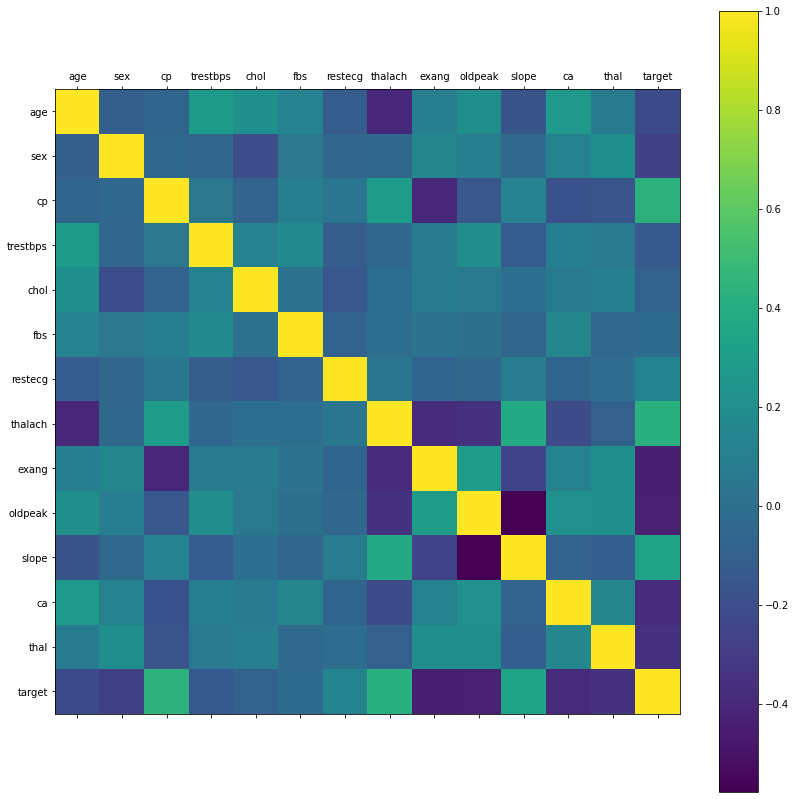

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

Looking at the correlation matrix above, it's clear that certain attributes have a negative connection with the goal value, whilst others have a positive association. The histograms for each variable will be examined next.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2135abdd10>,
      dtype=object)

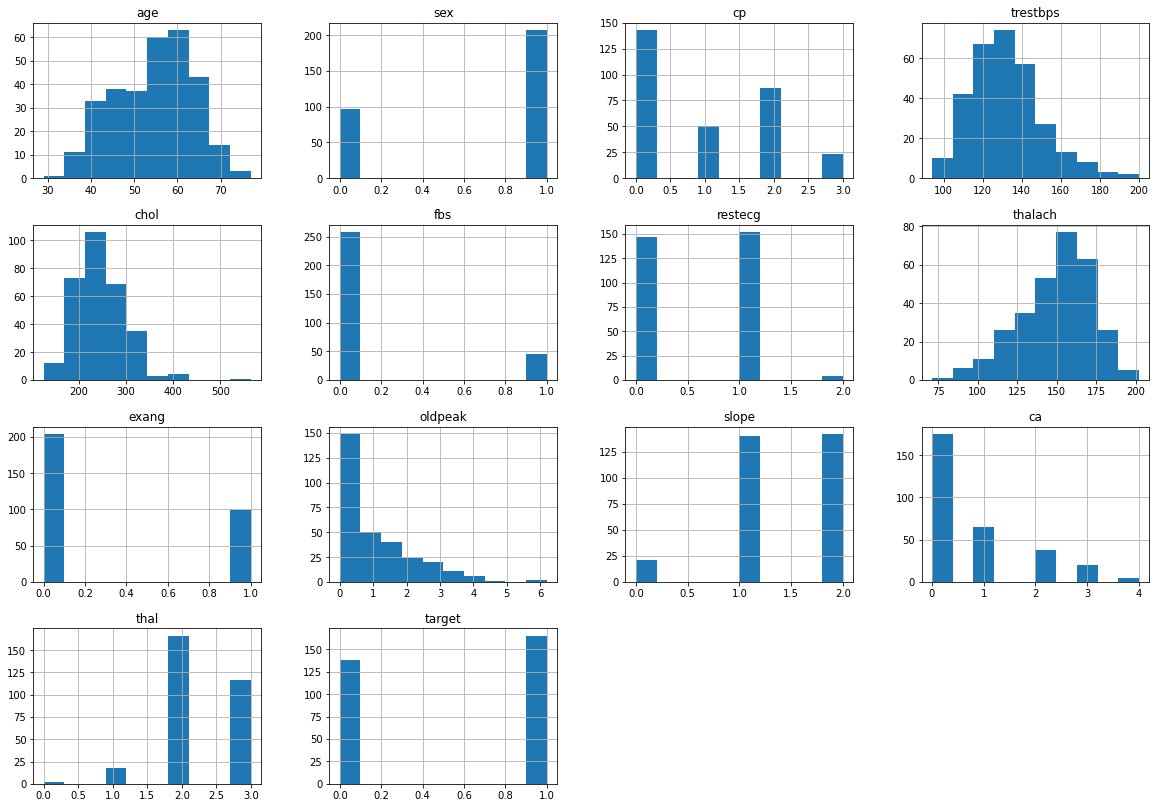

In [8]:
data.hist()

Looking at the histograms above, I can see that each characteristic has its own distribution range. As a result, scaling before our projections should be quite useful. The categorical characteristics also stand out.

<h5>Working with a dataset with goal classes that are about similar in size is always a smart idea. Let us investigate this further.</h5>

Text(0.5, 0, 'Target Classes')

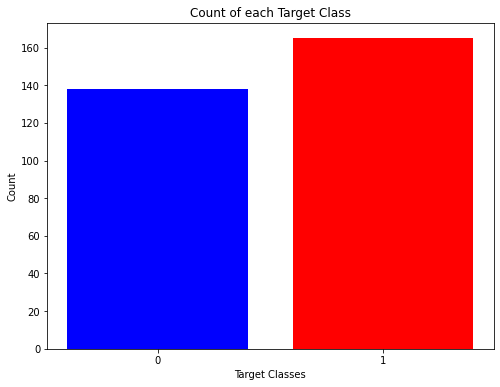

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['red', 'blue'])
plt.xticks([0, 1])
plt.title('Count of each Target Class')
plt.ylabel('Count')
plt.xlabel('Target Classes')


Although the two classes are not precisely 50 percent each, the ratio is excellent enough to allow us to continue without losing or expanding our data.

<h3> Data Processing</h3>
Before training the Machine Learning models, I discovered that I needed to turn certain category variables into dummy variables and scale all of the values. To begin, I'll generate dummy columns for category variables using the get_dummies method.

In [10]:
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


To scale my dataset, I'll use the StandardScaler from sklearn.

In [11]:
# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

The data is not ready for our Machine Learning application..

<h2> Machine learning part </h2>
To divide our dataset into training and testing datasets, I'll import train test split. Then, to train and test the data, I'll import all of the Machine Learning models I'll be utilizing.

In [13]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

<h2> K Neighbors Classifier algorithm </h2>
The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [14]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

In the array knn scores, I have the scores for various neighbor values. Now I'll plot it to determine which value of K yielded the greatest results.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

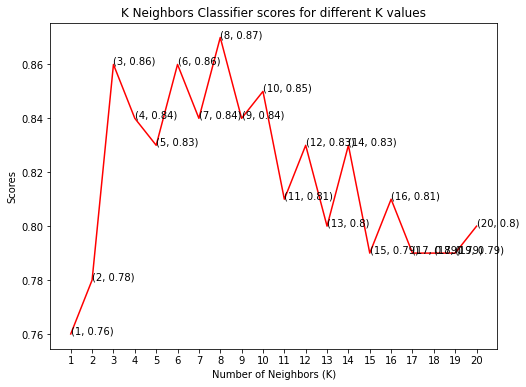

In [15]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was 0.87 for the 8 neighbors.



In [16]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))


The score for K Neighbors Classifier is 87.0% with 8 nieghbors.


# Support vector machine 
Support Vector Classifier has a number of kernels. I'll put some of them to the test and see who comes out on top.

In [17]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

I'll now plot a bar plot of scores for each kernel and see which performed the best.



Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

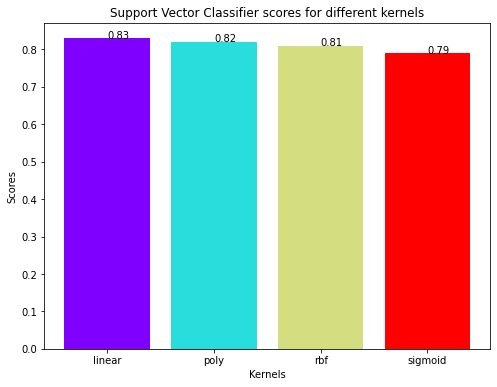

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The linear kernel performed the best, being slightly better than rbf kernel.

In [18]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 83.0% with linear kernel.


# Decision tree classifier algoritm
To represent the situation at hand, I'll utilize the Decision Tree Classifier. I'll try a few different max_features to see which one gives the best results.

In [19]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

For the split, I chose the maximum amount of characteristics from 1 to 30. Let's look at the results for each of those scenarios.



Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

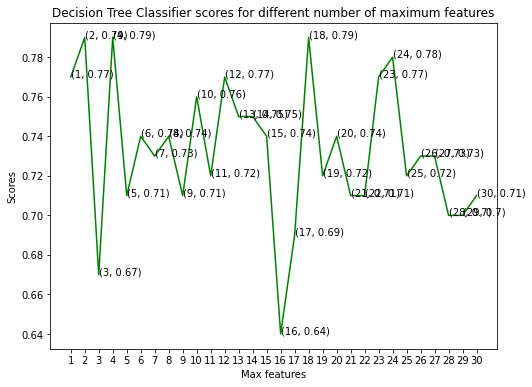

In [20]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, 2, 4 and 18.



In [21]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))


The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


**The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.**


# Random Forest Classifier
Now I'll design the model using the Random Forest Classifier ensemble approach and change the amount of estimators to observe how they affect the model.

In [22]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The model has been trained, and the results have been recorded. Let's make a bar graph to compare the results.

> Indented block



Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

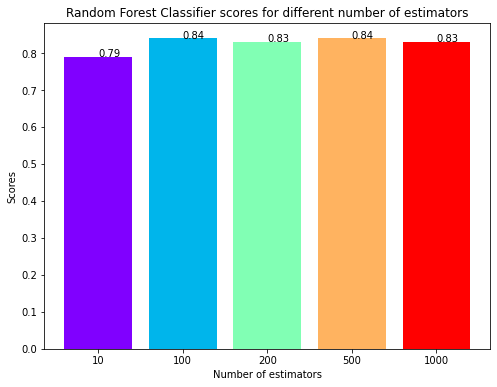

In [23]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

When the total estimators are 100 or 500, the maximum score is obtained.

In [24]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))


The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


**The score for Random Forest Classifier is 84.0% with [100, 500] estimators.**


# xgBoost machine learning algorithm
Now I'll design the model using the xgBoost algorithm and change the amount of estimators to observe how they affect the model.

In [25]:
xgBoost_scores = []
estimators = [10, 100, 200, 500, 10000]
for i in estimators:
    xgboostModel = XGBClassifier(n_estimators = i, random_state = 0)
    xgboostModel.fit(X_train, y_train)
    xgBoost_scores.append(xgboostModel.score(X_test, y_test))

In [ ]:
xgboostModel.score(X_test, y_test)

0.82

The model has been trained, and the results have been recorded. Let's make a bar graph to compare the results.





Text(0.5, 1.0, 'xgBoost classifier scores for different number of estimators')

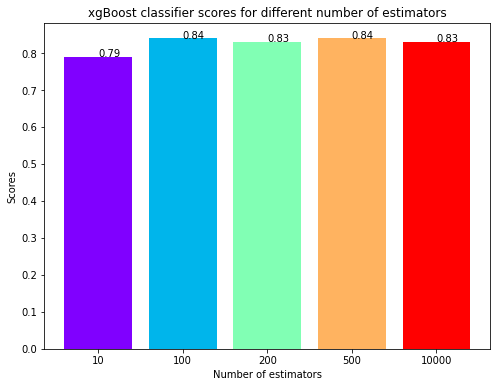

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('xgBoost classifier scores for different number of estimators')

When the total estimators are 100 or 500, the maximum score is obtained.

In [ ]:
xgboost_score = xgboostModel.score(X_test, y_test)*100

In [ ]:
print("The score for XGBoost Classifier is {}% with {} estimators.".format(xgboost_score, [100, 500]))

The score for XGBoost Classifier is 82.0% with [100, 500] estimators.


**The score XGBoost Classifier is 82.0% with [100, 500] estimators.**


# Articial neural network  algorithm
Now I'll design the model using the Articial neural network algorithm and change the amount of estimators to observe how they affect the model.

In [36]:
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), activation='relu', random_state=42)
ANN.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

In [38]:
Ann_score = ANN.score(X_test, y_test)*100

In [42]:
print("The score for Artificial Neural Network Classifier is {}% .".format(Ann_score))

The score for Artificial Neural Network Classifier is 85.0% .


# Conclusion
I applied Machine Learning in my research to predict whether or not a person has heart disease. I used plots to analyze the data once it was imported. Then, for category features, I created dummy variables and scaled other features. Then I used K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, XgBoost classifier and Artificial neural networks which are all Machine Learning and Neural network methods. To increase the scores of each model, I changed the parameters. With 8 closest neighbors, K Neighbors Classifier received the maximum score of 87 percent.